In [ ]:
!nvidia-smi

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


In [5]:
train_path = "C:/Users/Vijaya/Tomato_plant/raw/color/train/"
valid_path = "C:/Users/Vijaya/Tomato_plant/raw/color/test/"

In [6]:
# Import the inception v3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob("C:/Users/Vijaya/Tomato_plant/raw/color/train/*")

In [9]:
folders

['C:/Users/Vijaya/Tomato_plant/raw/color/train\\Tomato___Bacterial_spot',
 'C:/Users/Vijaya/Tomato_plant/raw/color/train\\Tomato___Early_blight',
 'C:/Users/Vijaya/Tomato_plant/raw/color/train\\Tomato___healthy',
 'C:/Users/Vijaya/Tomato_plant/raw/color/train\\Tomato___Late_blight',
 'C:/Users/Vijaya/Tomato_plant/raw/color/train\\Tomato___Leaf_Mold',
 'C:/Users/Vijaya/Tomato_plant/raw/color/train\\Tomato___Septoria_leaf_spot',
 'C:/Users/Vijaya/Tomato_plant/raw/color/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'C:/Users/Vijaya/Tomato_plant/raw/color/train\\Tomato___Target_Spot',
 'C:/Users/Vijaya/Tomato_plant/raw/color/train\\Tomato___Tomato_mosaic_virus',
 'C:/Users/Vijaya/Tomato_plant/raw/color/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [10]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("C:/Users/Vijaya/Tomato_plant/raw/color/train/",
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 14496 images belonging to 10 classes.


In [16]:
test_set = test_datagen.flow_from_directory("C:/Users/Vijaya/Tomato_plant/raw/color/test/",
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 3664 images belonging to 10 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
906/906 [==============================] - 847s 935ms/step - loss: 3.8477 - accuracy: 0.7230 - val_loss: 2.7104 - val_accuracy: 0.8106
Epoch 2/50
906/906 [==============================] - 820s 905ms/step - loss: 3.0936 - accuracy: 0.8151 - val_loss: 4.0651 - val_accuracy: 0.7789
Epoch 3/50
906/906 [==============================] - 548s 605ms/step - loss: 2.9574 - accuracy: 0.8440 - val_loss: 3.1724 - val_accuracy: 0.8477
Epoch 4/50
906/906 [==============================] - 507s 560ms/step - loss: 2.8709 - accuracy: 0.8578 - val_loss: 5.5172 - val_accuracy: 0.8019
Epoch 5/50
906/906 [==============================] - 6665s 7s/step - loss: 2.5560 - accuracy: 0.8742 - val_loss: 3.4438 - val_accuracy: 0.8466
Epoch 6/50
906/906 [==============================] - 798s 881ms/step - loss: 2.6848 - accuracy: 0.8774 - val_loss: 3.4071 - val_accuracy: 0.8562
Epoch 7/50
906/906 [==============================

In [18]:
import matplotlib.pyplot as plt

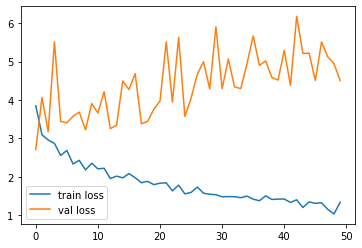

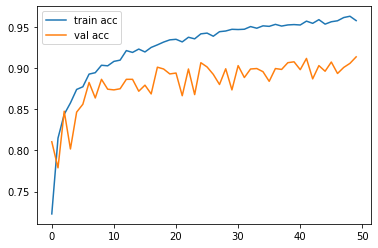

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:
y_pred

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 3.058218e-22, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)